In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import scipy.stats as st
from matplotlib.pyplot import figure
from scipy.stats import linregress

In [2]:
vbm_states = ["Oregon","Washington","Colorado","Utah","Hawaii"]
years = []
for i in range(1980,2017,2):
    years.append(i)
file = "../Data/voter_data.csv"
voter_data = pd.read_csv(file)
#Oregon Averages
or_slice = voter_data.loc[(voter_data["State"]=="Oregon") &
                          (voter_data["Year"] < 1998),:]
or_bef = round(or_slice["VEP Total Ballots Counted"].mean(),2)
or_slice = voter_data.loc[(voter_data["State"]=="Oregon") &
                          (voter_data["Year"] > 1998),:]
or_aft = round(or_slice["VEP Total Ballots Counted"].mean(),2)
or_mean = round(voter_data.loc[voter_data["State"]=="Oregon","VEP Total Ballots Counted"].mean(),2)
or_del = round(float(voter_data.loc[(voter_data["State"]=="Oregon") &
                              (voter_data["Year"]==2016),"VEP Total Ballots Counted"]) - float(
    voter_data.loc[(voter_data["State"]=="Oregon") &
                              (voter_data["Year"]==1980),"VEP Total Ballots Counted"]),2)
#Washington Averages
wa_slice = voter_data.loc[(voter_data["State"]=="Washington") &
                          (voter_data["Year"] < 2005),:]
wa_bef = round(wa_slice["VEP Total Ballots Counted"].mean(),2)
wa_slice = voter_data.loc[(voter_data["State"]=="Washington") &
                          (voter_data["Year"] > 2005),:]
wa_aft = round(wa_slice["VEP Total Ballots Counted"].mean(),2)
wa_mean = round(voter_data.loc[voter_data["State"]=="Washington","VEP Total Ballots Counted"].mean(),2)
wa_del = round(float(voter_data.loc[(voter_data["State"]=="Washington") &
                              (voter_data["Year"]==2016),"VEP Total Ballots Counted"]) - float(
    voter_data.loc[(voter_data["State"]=="Washington") &
                              (voter_data["Year"]==1980),"VEP Total Ballots Counted"]),2)
#Colorado Averages
co_slice = voter_data.loc[(voter_data["State"]=="Colorado") &
                          (voter_data["Year"] < 2013),:]
co_bef = round(co_slice["VEP Total Ballots Counted"].mean(),2)
co_slice = voter_data.loc[(voter_data["State"]=="Colorado") &
                          (voter_data["Year"] > 2013),:]
co_aft = round(co_slice["VEP Total Ballots Counted"].mean(),2)
co_mean = round(voter_data.loc[voter_data["State"]=="Colorado","VEP Total Ballots Counted"].mean(),2)
co_del = round(float(voter_data.loc[(voter_data["State"]=="Colorado") &
                              (voter_data["Year"]==2016),"VEP Total Ballots Counted"]) - float(
    voter_data.loc[(voter_data["State"]=="Colorado") &
                              (voter_data["Year"]==1980),"VEP Total Ballots Counted"]),2)
#Utah Averages
ut_slice = voter_data.loc[(voter_data["State"]=="Utah") &
                          (voter_data["Year"] < 2013),:]
ut_bef = round(ut_slice["VEP Total Ballots Counted"].mean(),2)
ut_slice = voter_data.loc[(voter_data["State"]=="Utah") &
                          (voter_data["Year"] > 2013),:]
ut_aft = round(ut_slice["VEP Total Ballots Counted"].mean(),2)
ut_mean = round(voter_data.loc[voter_data["State"]=="Utah","VEP Total Ballots Counted"].mean(),2)
ut_del = round(float(voter_data.loc[(voter_data["State"]=="Utah") &
                              (voter_data["Year"]==2016),"VEP Total Ballots Counted"]) - float(
    voter_data.loc[(voter_data["State"]=="Utah") &
                              (voter_data["Year"]==1980),"VEP Total Ballots Counted"]),2)
#Hawaii Averages
hi_mean = round(voter_data.loc[voter_data["State"]=="Hawaii","VEP Total Ballots Counted"].mean(),2)
hi_del = round(float(voter_data.loc[(voter_data["State"]=="Hawaii") &
                              (voter_data["Year"]==2016),"VEP Total Ballots Counted"]) - float(
    voter_data.loc[(voter_data["State"]=="Hawaii") &
                              (voter_data["Year"]==1980),"VEP Total Ballots Counted"]),2)
#VBM Grouped Averages
avg_vbm = voter_data.loc[voter_data["State"].isin(vbm_states)]
vbm_mean = round(avg_vbm["VEP Total Ballots Counted"].mean(),2)
avg_vbm = avg_vbm.groupby("Year").mean()
vbm_del = round(avg_vbm.loc[2016,"VEP Total Ballots Counted"] - avg_vbm.loc[1980,"VEP Total Ballots Counted"],2)
#Non-VBM Averages
avg_nonvbm = voter_data.loc[~voter_data["State"].isin(vbm_states)]
non_mean = round(avg_nonvbm["VEP Total Ballots Counted"].mean(),2)
avg_nonvbm = avg_nonvbm.groupby("Year").mean()
non_del = round(avg_nonvbm.loc[2016,"VEP Total Ballots Counted"] - avg_nonvbm.loc[1980,"VEP Total Ballots Counted"],2)
#All 50 Averages
all_mean = round(voter_data["VEP Total Ballots Counted"].mean(),2)
all_del = round(float(voter_data.loc[voter_data["Year"]==2016,"VEP Total Ballots Counted"].mean()) - float(
voter_data.loc[voter_data["Year"]==1980,"VEP Total Ballots Counted"].mean()),2)

a = "N/A"

vbm_mean_comp = pd.DataFrame({
    "State":["Oregon","Washington","Colorado","Utah","Hawaii","VBM States Grouped","Non-VBM States","All States"],
    "Pre VBM - Mean Turnout":[or_bef,wa_bef,co_bef,ut_bef,a,a,a,a],
    "Post VBM - Mean Turnout":[or_aft,wa_aft,co_aft,ut_aft,a,a,a,a],
    "Overall - Mean Turnout":[or_mean,wa_mean,co_mean,ut_mean,hi_mean,vbm_mean,non_mean,all_mean],
    "Gross Change in Turnout (1980 - 2016)":[or_del,wa_del,co_del,ut_del,hi_del,vbm_del,non_del,all_del]
})


yticks = np.arange(0.35,0.85,0.10)
a = 0
for i in yticks:
    yticks[a]=round(yticks[a],2)
    a=a+1
vbm_mean_comp.to_csv("vbm_stats.csv",encoding="utf-8",index=False)
vbm_mean_comp

,State,Pre VBM - Mean Turnout,Post VBM - Mean Turnout,Overall - Mean Turnout,Gross Change in Turnout (1980 - 2016)
0,Oregon,0.61,0.61,0.60,0.04
1,Washington,0.54,0.57,0.55,0.05
2,Colorado,0.56,0.63,0.57,0.13
3,Utah,0.51,0.44,0.51,-0.09
4,Hawaii,N/A,N/A,0.46,-0.06
5,VBM States Grouped,N/A,N/A,0.54,0.01
6,Non-VBM States,N/A,N/A,0.52,0.04
7,All States,N/A,N/A,0.52,0.03


In [32]:
# Import data and create dataframe
map_data = "../Data/joint_data_12_to_16.csv"
map_data_df = pd.read_csv(map_data, encoding="utf-8")
# Filter down to just the needed data for 2016
map_data_counts_df = pd.DataFrame(map_data_df[["Year", "Abbrv", "Population", "Median Age", "Voting-Eligible Population (VEP)", "VEP Total Ballots Counted"]])
map_data_2016_df = map_data_counts_df.loc[(map_data_counts_df["Year"] == 2016) & (map_data_counts_df["Abbrv"] != "US")]
# Create US map based on VEP Ballots
fig = go.Figure(data=go.Choropleth(
    locations=map_data_2016_df['Abbrv'], # Spatial coordinates
    z = map_data_2016_df['VEP Total Ballots Counted'].astype(float)*100, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_ticksuffix = '%',
    colorbar_title = "Ballot Count (%)",
))

fig.update_layout(
    title_text = '2016 Voting Eligible Population Ballot Counts by State*',
    geo_scope='usa', # limite map scope to USA
    annotations = [dict(
        x=0.1,
        y=-0.15,
        text='*(EXCLUDES: Mississippi, Oklahoma, Virginia, West Virginia, Pennsylvania, Wisconsin)',
        showarrow = False
    )]
)
# Save the image as a png file and show the image
fig.write_image("../Visualizations/us_ballot_counts.png")
fig.show()
avg_us_ballots = map_data_2016_df["VEP Total Ballots Counted"].mean()
print(f"The average VEP US ballot count is {avg_us_ballots:.1%}")

The average VEP US ballot count is 61.9%


In [6]:
# Create US map based on Population
fig2 = go.Figure(data=go.Choropleth(
    locations=map_data_2016_df['Abbrv'], # Spatial coordinates
    z = map_data_2016_df['Population'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Greens',
    #colorbar_ticksuffix = '%',
    colorbar_title = "Population<br>(in Millions)",
))

fig2.update_layout(
    title_text = '2016 Population Counts by State*',
    geo_scope='usa', # limite map scope to USA
        annotations = [dict(
        x=0.1,
        y=-0.1,
        xref='paper',
        yref='paper',
        text='*(EXCLUDES: Mississippi, Oklahoma, Virginia, West Virginia, Pennsylvania, Wisconsin)',
        showarrow = False
    )]
)

# Save the image as a png file and show the image
fig2.write_image("../Visualizations/us_population.png")
fig2.show()
avg_US_pop = map_data_2016_df["Population"].mean()
print(f"The average US population is {avg_US_pop:,.0f}")

The average US population is 6,386,875


In [7]:
# Create US map based on Median Age
fig3 = go.Figure(data=go.Choropleth(
    locations=map_data_2016_df['Abbrv'], # Spatial coordinates
    z = map_data_2016_df['Median Age'],#.astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Purples',
    #colorbar_ticksuffix = '%',
    colorbar_title = "Median Age<br>(Years)",
))

fig3.update_layout(
    title_text = '2016 Median Age by State*',
    geo_scope='usa', # limite map scope to USA
        annotations = [dict(
        x=0.1,
        y=-0.1,
        xref='paper',
        yref='paper',
        text='*(EXCLUDES: Mississippi, Oklahoma, Virginia, West Virginia, Pennsylvania, Wisconsin)',
        showarrow = False
    )]
)

# Save the image as a png file and show the image
fig3.write_image("../Visualizations/us_age.png")
fig3.show()
avg_US_age = map_data_2016_df["Median Age"].mean()
print(f"The average US age is {avg_US_age:,.1f}")

The average US age is 38.1


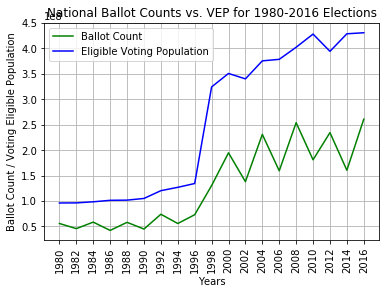

In [15]:
#All States
# Plot the data in a line plot
# Create a list of the years to use as the x-axis
voter_data_group = voter_data.groupby("Year").sum()
years = voter_data_group.index
# Create a list of ballot counts and voting eligible population for the y-axis
ballot_count = voter_data_group["Total Ballots Counted (Estimate)"]
population = voter_data_group["Voting-Eligible Population (VEP)"]

# Plot the line that will be used to track OR Ballot Counts over the years
plt.plot(years, ballot_count, color="green", label="Ballot Count")

# Plot the line that will be used to track OR Voting Eligible Population over the years
plt.plot(years, population, color="blue", label="Eligible Voting Population")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("National Ballot Counts vs. VEP for 1980-2016 Elections")
plt.xticks(years, rotation=90)
plt.xlabel("Years")
plt.ylabel("Ballot Count / Voting Eligible Population")

plt.grid()

# Print the chart to the screen
plt.savefig('../Visualizations/us_gross.png')

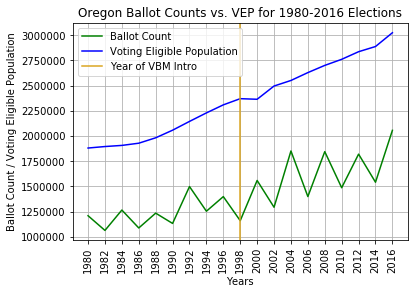

In [16]:
# Remove unnecessary columns and filter to just return Oregon data
or_data_df = pd.DataFrame(voter_data[["Year", "Abbrv", "Total Ballots Counted (Estimate)", "Voting-Eligible Population (VEP)"]])
or_only_data_df = or_data_df.loc[(or_data_df["Abbrv"] == "OR")].reset_index(drop=True)
# Plot the data in a line plot
# Create a list of the years to use as the x-axis
years = or_only_data_df["Year"]

# Create a list of ballot counts and voting eligible population for the y-axis
ballot_count = or_only_data_df["Total Ballots Counted (Estimate)"]
population = or_only_data_df["Voting-Eligible Population (VEP)"]

# Plot the line that will be used to track OR Ballot Counts over the years
plt.plot(years, ballot_count, color="green", label="Ballot Count")

# Plot the line that will be used to track OR Voting Eligible Population over the years
plt.plot(years, population, color="blue", label="Eligible Voting Population")

plt.title("Oregon Ballot Counts vs. VEP for 1980-2016 Elections")
plt.xticks(years, rotation=90)
plt.xlabel("Years")
plt.ylabel("Ballot Count / Voting Eligible Population")

# Add vertical line to mark when VBM went into affect
plt.axvline(x=1998,c="goldenrod")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(["Ballot Count", "Voting Eligible Population","Year of VBM Intro"],loc="best")
plt.grid()

# Print the chart to the screen
plt.savefig('../Visualizations/or_gross.png')

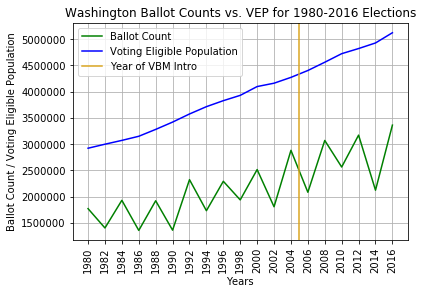

In [18]:
#Washington
# Remove unnecessary columns and filter to just return Oregon data
wa_data_df = pd.DataFrame(voter_data[["Year", "Abbrv", "Total Ballots Counted (Estimate)", "Voting-Eligible Population (VEP)"]])
wa_only_data_df = wa_data_df.loc[(wa_data_df["Abbrv"] == "WA")].reset_index(drop=True)
# Plot the data in a line plot
# Create a list of the years to use as the x-axis
years = wa_only_data_df["Year"]

# Create a list of ballot counts and voting eligible population for the y-axis
ballot_count = wa_only_data_df["Total Ballots Counted (Estimate)"]
population = wa_only_data_df["Voting-Eligible Population (VEP)"]

# Plot the line that will be used to track OR Ballot Counts over the years
plt.plot(years, ballot_count, color="green", label="Ballot Count")

# Plot the line that will be used to track OR Voting Eligible Population over the years
plt.plot(years, population, color="blue", label="Eligible Voting Population")

plt.title("Washington Ballot Counts vs. VEP for 1980-2016 Elections")
plt.xticks(years, rotation=90)
plt.xlabel("Years")
plt.ylabel("Ballot Count / Voting Eligible Population")

# Add vertical line to mark when VBM went into affect
plt.axvline(x=2005,c="goldenrod")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(["Ballot Count", "Voting Eligible Population","Year of VBM Intro"],loc="best")
plt.grid()

# Print the chart to the screen
plt.savefig('../Visualizations/wa_gross.png')

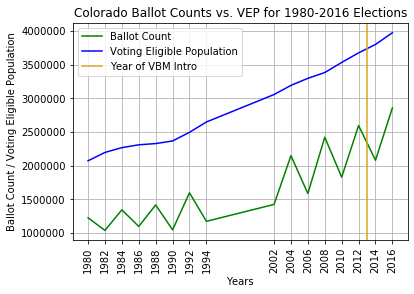

In [19]:
#Colorado
# Remove unnecessary columns and filter to just return Oregon data
co_data_df = pd.DataFrame(voter_data[["Year", "Abbrv", "Total Ballots Counted (Estimate)", "Voting-Eligible Population (VEP)"]])
co_only_data_df = co_data_df.loc[(co_data_df["Abbrv"] == "CO")].reset_index(drop=True)
# Plot the data in a line plot
# Create a list of the years to use as the x-axis
years = co_only_data_df["Year"]

# Create a list of ballot counts and voting eligible population for the y-axis
ballot_count = co_only_data_df["Total Ballots Counted (Estimate)"]
population = co_only_data_df["Voting-Eligible Population (VEP)"]

# Plot the line that will be used to track OR Ballot Counts over the years
plt.plot(years, ballot_count, color="green", label="Ballot Count")

# Plot the line that will be used to track OR Voting Eligible Population over the years
plt.plot(years, population, color="blue", label="Eligible Voting Population")

plt.title("Colorado Ballot Counts vs. VEP for 1980-2016 Elections")
plt.xticks(years, rotation=90)
plt.xlabel("Years")
plt.ylabel("Ballot Count / Voting Eligible Population")

# Add vertical line to mark when VBM went into affect
plt.axvline(x=2013,c="goldenrod")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(["Ballot Count", "Voting Eligible Population","Year of VBM Intro"],loc="best")
plt.grid()

# Print the chart to the screen
plt.savefig('../Visualizations/co_gross.png')

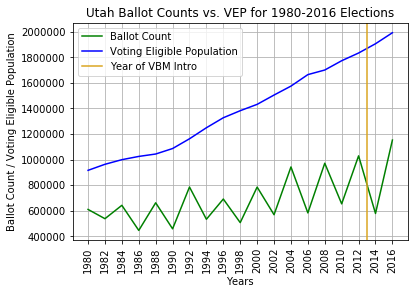

In [21]:
#Utah
# Remove unnecessary columns and filter to just return Oregon data
ut_data_df = pd.DataFrame(voter_data[["Year", "Abbrv", "Total Ballots Counted (Estimate)", "Voting-Eligible Population (VEP)"]])
ut_only_data_df = ut_data_df.loc[(ut_data_df["Abbrv"] == "UT")].reset_index(drop=True)
# Plot the data in a line plot
# Create a list of the years to use as the x-axis
years = ut_only_data_df["Year"]

# Create a list of ballot counts and voting eligible population for the y-axis
ballot_count = ut_only_data_df["Total Ballots Counted (Estimate)"]
population = ut_only_data_df["Voting-Eligible Population (VEP)"]

# Plot the line that will be used to track OR Ballot Counts over the years
plt.plot(years, ballot_count, color="green", label="Ballot Count")

# Plot the line that will be used to track OR Voting Eligible Population over the years
plt.plot(years, population, color="blue", label="Eligible Voting Population")

plt.title("Utah Ballot Counts vs. VEP for 1980-2016 Elections")
plt.xticks(years, rotation=90)
plt.xlabel("Years")
plt.ylabel("Ballot Count / Voting Eligible Population")

# Add vertical line to mark when VBM went into affect
plt.axvline(x=2013,c="goldenrod")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(["Ballot Count", "Voting Eligible Population","Year of VBM Intro"],loc="best")
plt.grid()

# Print the chart to the screen
plt.savefig('../Visualizations/ut_gross.png')

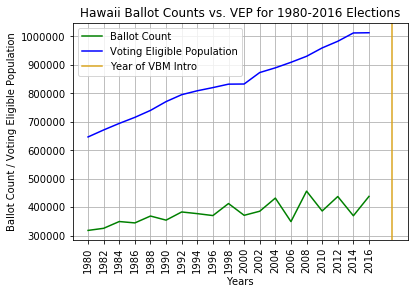

In [22]:
#Hawaii
# Remove unnecessary columns and filter to just return Oregon data
hi_data_df = pd.DataFrame(voter_data[["Year", "Abbrv", "Total Ballots Counted (Estimate)", "Voting-Eligible Population (VEP)"]])
hi_only_data_df = hi_data_df.loc[(hi_data_df["Abbrv"] == "HI")].reset_index(drop=True)
# Plot the data in a line plot
# Create a list of the years to use as the x-axis
years = hi_only_data_df["Year"]

# Create a list of ballot counts and voting eligible population for the y-axis
ballot_count = hi_only_data_df["Total Ballots Counted (Estimate)"]
population = hi_only_data_df["Voting-Eligible Population (VEP)"]

# Plot the line that will be used to track OR Ballot Counts over the years
plt.plot(years, ballot_count, color="green", label="Ballot Count")

# Plot the line that will be used to track OR Voting Eligible Population over the years
plt.plot(years, population, color="blue", label="Eligible Voting Population")

### Place a legend on the chart in what matplotlib believes to be the "best" location
##plt.legend(loc="best")

plt.title("Hawaii Ballot Counts vs. VEP for 1980-2016 Elections")
plt.xticks(years, rotation=90)
plt.xlabel("Years")
plt.ylabel("Ballot Count / Voting Eligible Population")

# Add vertical line to mark when VBM went into affect
plt.axvline(x=2019,c="goldenrod")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(["Ballot Count", "Voting Eligible Population","Year of VBM Intro"],loc="best")
plt.grid()

# Print the chart to the screen
plt.savefig('../Visualizations/hi_gross.png')

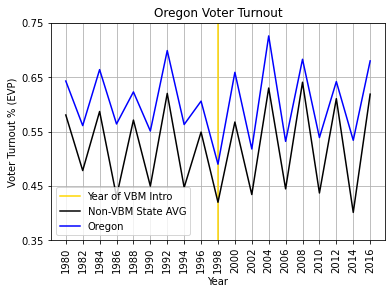

In [12]:
#Oregon
fig1, ax1 = plt.subplots()
ax1.set_xticks(years)
ax1.set_xticklabels(years,rotation="vertical")
ax1.set_title("Oregon Voter Turnout")
ax1.set_ylabel('Voter Turnout % (EVP)')
ax1.set_xlabel('Year')
ax1.axvline(x=1998, ymin=0.0, ymax=1, color="gold")
ax1.plot(avg_nonvbm.index,avg_nonvbm["VEP Total Ballots Counted"],color="black")
ax1.plot(voter_data.loc[voter_data["State"]=="Oregon","Year"],voter_data.loc[voter_data["State"]=="Oregon","VEP Total Ballots Counted"],color="blue")
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticks)
ax1.legend(["Year of VBM Intro","Non-VBM State AVG","Oregon"],loc="lower left")
plt.grid()
plt.savefig('../Visualizations/or_prop.png')

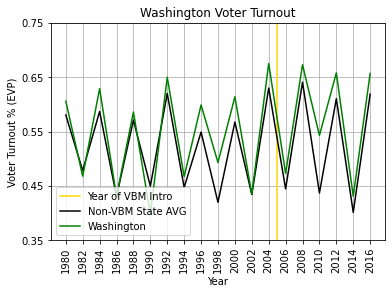

In [13]:
#Washington
fig2, ax1 = plt.subplots()
ax1.set_xticks(years)
ax1.set_xticklabels(years,rotation="vertical")
ax1.set_title("Washington Voter Turnout")
ax1.set_ylabel('Voter Turnout % (EVP)')
ax1.set_xlabel('Year')
ax1.axvline(x=2005, ymin=0.0, ymax=1, color="gold")
ax1.plot(avg_nonvbm.index,avg_nonvbm["VEP Total Ballots Counted"],color="black")
ax1.plot(voter_data.loc[voter_data["State"]=="Washington","Year"],voter_data.loc[voter_data["State"]=="Washington","VEP Total Ballots Counted"],color="green")
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticks)
ax1.legend(["Year of VBM Intro","Non-VBM State AVG","Washington"],loc="lower left")
plt.grid() 
plt.savefig('../Visualizations/wa_prop.png')

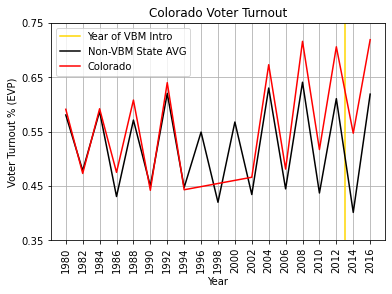

In [14]:
#Colorado
fig3, ax1 = plt.subplots()
ax1.set_xticks(years)
ax1.set_xticklabels(years,rotation="vertical")
ax1.set_title("Colorado Voter Turnout")
ax1.set_ylabel('Voter Turnout % (EVP)')
ax1.set_xlabel('Year')
ax1.axvline(x=2013, ymin=0.0, ymax=1, color="gold")
ax1.plot(avg_nonvbm.index,avg_nonvbm["VEP Total Ballots Counted"],color="black")
ax1.plot(voter_data.loc[voter_data["State"]=="Colorado","Year"],voter_data.loc[voter_data["State"]=="Colorado","VEP Total Ballots Counted"],color="red")
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticks)
ax1.legend(["Year of VBM Intro","Non-VBM State AVG","Colorado"],loc="upper left")
plt.grid()
plt.savefig('../Visualizations/co_prop.png')
#Incorporate comment or note on chart about Missing data in middle

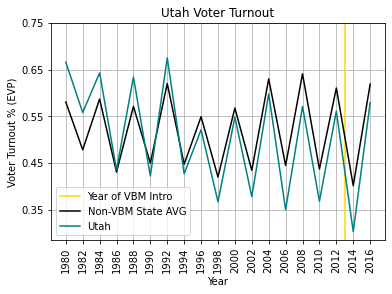

In [15]:
#Utah
fig4, ax1 = plt.subplots()
ax1.set_xticks(years)
ax1.set_xticklabels(years,rotation="vertical")
ax1.set_title("Utah Voter Turnout")
ax1.set_ylabel('Voter Turnout % (EVP)')
ax1.set_xlabel('Year')
ax1.axvline(x=2013, ymin=0.0, ymax=1, color="gold")
ax1.plot(avg_nonvbm.index,avg_nonvbm["VEP Total Ballots Counted"],color="black")
ax1.plot(voter_data.loc[voter_data["State"]=="Utah","Year"],voter_data.loc[voter_data["State"]=="Utah","VEP Total Ballots Counted"],color="teal")
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticks)
ax1.legend(["Year of VBM Intro","Non-VBM State AVG","Utah"],loc="lower left")
plt.grid()
plt.savefig('../Visualizations/ut_prop.png')

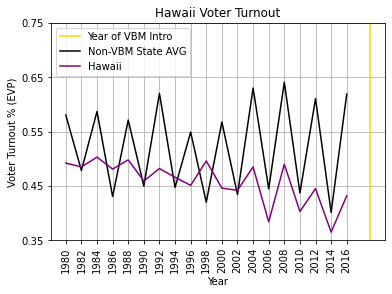

In [16]:
#Hawaii
fig5, ax1 = plt.subplots()
ax1.set_xticks(years)
ax1.set_xticklabels(years,rotation="vertical")
ax1.set_title("Hawaii Voter Turnout")
ax1.set_ylabel('Voter Turnout % (EVP)')
ax1.set_xlabel('Year')
ax1.axvline(x=2019, ymin=0.0, ymax=1, color="gold")
ax1.plot(avg_nonvbm.index,avg_nonvbm["VEP Total Ballots Counted"],color="black")
ax1.plot(voter_data.loc[voter_data["State"]=="Hawaii","Year"],voter_data.loc[voter_data["State"]=="Hawaii","VEP Total Ballots Counted"],color="purple")
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticks)
ax1.legend(["Year of VBM Intro","Non-VBM State AVG","Hawaii"],loc="upper left")
plt.grid()
plt.savefig('../Visualizations/hi_prop.png')

In [17]:
csv = pd.read_csv('../Data/joint_data_12_to_16_noformatting.csv')

joint_df = pd.DataFrame(csv)
#joint_df.drop(columns=["Abbrv"])
joint_df = joint_df.sort_values(['State','Year'])
joint_df = joint_df.reset_index(drop=True)
joint_df['Commute Times Combined (auto/public/walking)'] = joint_df['Transit: Solo Auto']+joint_df['Transit: Public Transit']+joint_df['Transit: Walking']
joint_df['Avg Commute: Solo Auto'] = joint_df['Transit: Solo Auto']/joint_df['Population']
joint_df['Avg Commute: Public Transit'] = joint_df['Transit: Public Transit']/joint_df['Population']
joint_df['Avg Commute: Walking'] = joint_df['Transit: Walking']/joint_df['Population']

float_int_only = joint_df
float_int_only = float_int_only.drop(columns=['Year','State'])

ballots = float_int_only['VEP Total Ballots Counted']
columns = []
r_values = []

for f in float_int_only:
    x_values = float_int_only[f]
    y_values = ballots
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    r_values.append(rvalue)
    columns.append(f)

    
r_value_df = pd.DataFrame({'Column Name':columns,
                          'R-Values':r_values})
r_value_df['R-Squared'] = r_value_df['R-Values']**2
r_value_df = r_value_df.sort_values('R-Squared', ascending=False)
mail_in_states = joint_df.loc[(joint_df['State'] == 'Oregon') |
                             (joint_df['State'] == 'Washington') |
                             (joint_df['State'] == 'Hawaii') |
                             (joint_df['State'] == 'Utah') |
                             (joint_df['State'] == 'Colorado')]
in_person_states = joint_df.loc[(joint_df['State'] != 'Oregon') &
                             (joint_df['State'] != 'Washington') &
                             (joint_df['State'] != 'Hawaii') &
                             (joint_df['State'] != 'Utah') &
                             (joint_df['State'] != 'Colorado')]

mail_in_float_int_only = mail_in_states
mail_in_float_int_only = mail_in_float_int_only.drop(columns=['Year','State'])

in_person_float_int_only = in_person_states
in_person_float_int_only = in_person_float_int_only.drop(columns=['Year','State'])

mail_in_ballots = mail_in_states['VEP Total Ballots Counted']
mail_in_columns = []
mail_in_r_values = []


for m in mail_in_float_int_only:
    x_values = mail_in_float_int_only[m]
    y_values = mail_in_ballots
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    mail_in_r_values.append(rvalue)
    mail_in_columns.append(m)

in_person_ballots = in_person_states['VEP Total Ballots Counted']
in_person_columns = []
in_person_r_values = []    

for i in in_person_float_int_only:
    x_values = in_person_float_int_only[i]
    y_values = in_person_ballots
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    in_person_r_values.append(rvalue)
    in_person_columns.append(i)

vote_type_r_value_df = pd.DataFrame({'Column Name':in_person_columns,
                          # NOTE: 'mail_in_r_values' is an analysis of 15 rows of data
                          'Mail-In R-Values':mail_in_r_values,
                          # NOTE: 'in_person_r_values' is an analysis of 119 rows of data
                          'In-Person R-Values':in_person_r_values})
vote_type_r_value_df['Mail-In R-Squared'] = vote_type_r_value_df['Mail-In R-Values']**2
vote_type_r_value_df['In-Person R-Squared'] = vote_type_r_value_df['In-Person R-Values']**2
vote_type_r_value_df = vote_type_r_value_df.sort_values('In-Person R-Squared', ascending=False)
total_r_value_df = pd.merge(r_value_df,vote_type_r_value_df,on='Column Name')
total_r_value_df = total_r_value_df[['Column Name','R-Values','R-Squared','Mail-In R-Values','Mail-In R-Squared','In-Person R-Values','In-Person R-Squared']]
total_r_value_df.to_csv("demo_regress.csv",encoding="utf-8",index=False)

The r-squared is: 0.06589632119337634


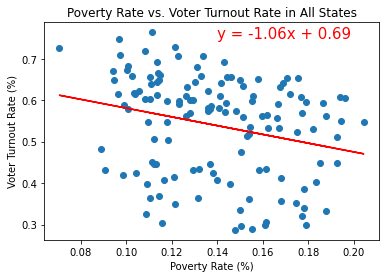

In [18]:
x_values = joint_df['Poverty Rate']
y_values = joint_df['VEP Total Ballots Counted']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-squared is: {rvalue**2}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.14,.75),fontsize=15,color="red")
plt.title('Poverty Rate vs. Voter Turnout Rate in All States')
plt.xlabel('Poverty Rate (%)')
plt.ylabel('Voter Turnout Rate (%)')
plt.savefig('../Visualizations/pov_all_states.png')

The r-squared is: 0.09424011250700502


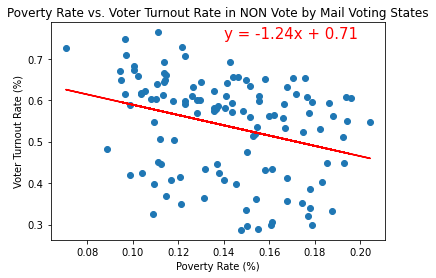

In [19]:
x_values = in_person_float_int_only['Poverty Rate']
y_values = in_person_float_int_only['VEP Total Ballots Counted']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-squared is: {rvalue**2}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.14,.75),fontsize=15,color="red")
plt.title('Poverty Rate vs. Voter Turnout Rate in NON Vote by Mail Voting States')
plt.xlabel('Poverty Rate (%)')
plt.ylabel('Voter Turnout Rate (%)')
plt.savefig('../Visualizations/pov_nonvbm_states.png')

The r-squared is: 0.08502035069521645


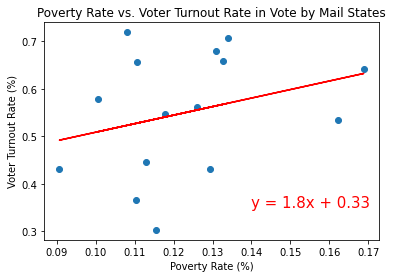

In [20]:
x_values = mail_in_float_int_only['Poverty Rate']
y_values = mail_in_float_int_only['VEP Total Ballots Counted']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-squared is: {rvalue**2}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.14,.35),fontsize=15,color="red")
plt.title('Poverty Rate vs. Voter Turnout Rate in Vote by Mail States')
plt.xlabel('Poverty Rate (%)')
plt.ylabel('Voter Turnout Rate (%)')
plt.savefig('../Visualizations/pov_vbm_states.png')